In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.1.0


In [32]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [33]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [34]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [20]:
##Data exploration

In [35]:
X_test.shape
X_train.shape

(60000, 28, 28)

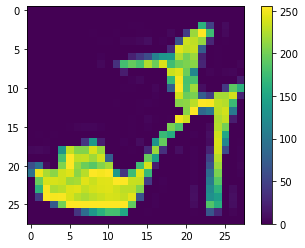

In [40]:
plt.figure()
plt.imshow(X_train[9])
plt.colorbar()

In [46]:
###As you can see there is values up to 255, but Neural Networks only take in values between 0 and 1. Therefore we have to reduce 
###this scale, by dividing the testing and training datasets

In [43]:
X_train = X_train/255.0

In [44]:
X_test = X_test/255.0

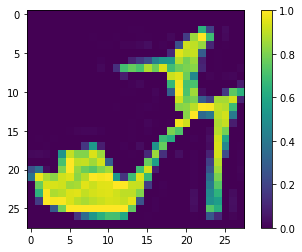

In [45]:
#CHeck to see it worked and reprint the scale
plt.figure()
plt.imshow(X_train[9])
plt.colorbar()

In [47]:
#now we build the model
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Flatten, Dense

In [51]:
model = Sequential()
model.add(Flatten(input_shape = (28, 28)))
#Shift double tab on dense - we need the units, activation, use_bias, and more formats
#activation = is the activation function
#the 28 comes from the size of the photo (pixels)
model.add(Dense(128, activation='relu'))
#the output layer must define the number of outputs you have - here we have 10
model.add(Dense(10, activation = 'softmax'))

In [52]:
model.summary()
#here you can see what the models are doing individually 
#the first model - flatten is taking the 28x28 (2-dimension) into a single dimension
#then, 128 which is the complexity of the model
#the output is then 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#now we need to compile out model 
#we first need to define the loss function 
#What loss function do we want - bascially how well the model is doing on the training and testing - reduce testing error
#be aware of overfitting
# Optimizer - based on the results- the weights on the data are changed 
#also the Metrics

In [53]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [54]:
model.fit(X_train, Y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.4992 - accuracy: 0.8241
Epoch 2/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.3767 - accuracy: 0.8643
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3415 - accuracy: 0.8753
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3156 - accuracy: 0.8842
Epoch 5/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2945 - accuracy: 0.8921
Epoch 6/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2806 - accuracy: 0.8965
Epoch 7/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2663 - accuracy: 0.9018
Epoch 8/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2580 - accuracy: 0.9032
Epoch 9/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2484 - accuracy: 0.9077
Epoch 10/10


In [ ]:
#The epochs and optimizer work in tandem with backpropogation, so that each time a new epoch is run the model weights are 
#changed to drive more accurate results. - as you can see from the incremental accuracy increases 
#Epoch = 10 therefore the model is getting trained 10 times on the whole data and the weights are getting updated 10 times too

In [55]:
#Evaluate the model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(test_acc)
#here we note that the final training accuracy was 91.15% and the final tested accuracy was 88%
#The loss wa 0.3442

10000/10000 [==============================] - 1s 76us/sample - loss: 0.3442 - accuracy: 0.8805
0.8805


In [58]:
pred = model.predict(X_test)
pred

array([[1.5232185e-06, 1.4423158e-07, 7.0038975e-10, ..., 1.5901854e-02,
        3.6720942e-07, 9.8401743e-01],
       [5.0231534e-05, 5.1321993e-15, 9.9662018e-01, ..., 2.7147933e-16,
        5.0968448e-12, 2.3692596e-15],
       [1.6418740e-06, 9.9999833e-01, 7.4491711e-11, ..., 4.5723126e-20,
        1.1572849e-11, 2.3506304e-18],
       ...,
       [2.4197844e-04, 1.2248948e-10, 2.9290813e-06, ..., 1.1909583e-09,
        9.9931753e-01, 1.3086675e-10],
       [2.3690914e-07, 9.9999940e-01, 2.0564705e-10, ..., 3.4890363e-15,
        7.2465851e-09, 1.7227499e-15],
       [3.5252273e-05, 4.3164352e-09, 3.7869127e-06, ..., 5.1815138e-04,
        1.9365801e-04, 8.5666824e-07]], dtype=float32)

In [59]:
pred[0]

array([1.5232185e-06, 1.4423158e-07, 7.0038975e-10, 5.7033596e-09,
       2.0842336e-08, 7.4268457e-05, 4.4223998e-06, 1.5901854e-02,
       3.6720942e-07, 9.8401743e-01], dtype=float32)

In [69]:
np.argmax(pred[9999])

5